<a href="https://colab.research.google.com/github/mohit-kr98/MedLine-plus-ecommerce-website/blob/master/JobFlowTimeEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing**

In [27]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [28]:

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [29]:
# PyMC3 for Bayesian Inference
import pymc3 as pm
from pymc3 import *

# **Reading Data**

In [30]:
df = pd.read_csv('Data.csv')
df.head()

,processCount,TotalDatabaseCount,TotalTableCount,TotalRuleCount,TotalTimeTakenSeconds
0,1,1,1,8,122
1,1,1,1,8,108
2,1,1,1,1,18
3,1,1,1,1,37
4,1,1,1,1,42


In [31]:
df.shape

(1921, 5)

In [32]:
df.describe()

,processCount,TotalDatabaseCount,TotalTableCount,TotalRuleCount,TotalTimeTakenSeconds
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,1.702238,1.702238,11.475794,13.560125,2607.415929
std,0.457393,0.457393,31.661928,25.014926,2557.707528
min,1.000000,1.000000,1.000000,0.000000,7.000000
25%,1.000000,1.000000,2.000000,12.000000,173.000000
50%,2.000000,2.000000,8.000000,13.000000,1837.000000
75%,2.000000,2.000000,8.000000,14.000000,4117.000000
max,2.000000,2.000000,544.000000,499.000000,20262.000000


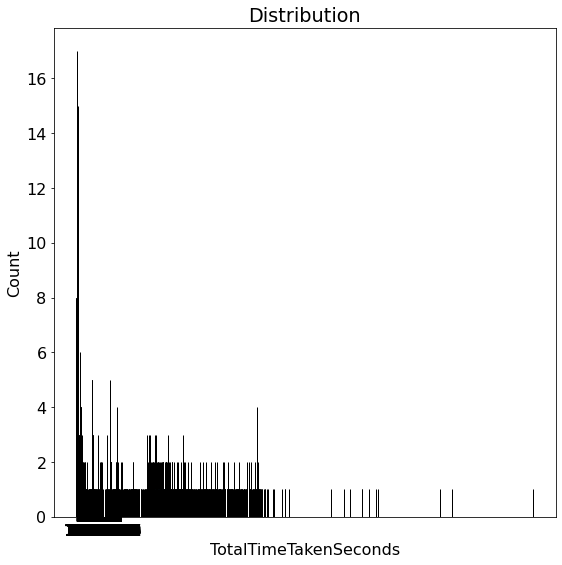

In [33]:

# Bar plot of grades
plt.bar(df['TotalTimeTakenSeconds'].value_counts().index, 
        df['TotalTimeTakenSeconds'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('TotalTimeTakenSeconds'); plt.ylabel('Count'); plt.title('Distribution');
plt.xticks(list(range(10, 2000)));

In [34]:
# Split into training/testing sets with 20% split
labels=df['TotalTimeTakenSeconds']
X_train, X_test, y_train, y_test = train_test_split(df, labels,test_size = 0.2,random_state=42)

# **Establish Benchmarks**

In [35]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [36]:

# Naive baseline is the median
median_pred = X_train['TotalTimeTakenSeconds'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['TotalTimeTakenSeconds']

In [37]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2149.0078
Median Baseline RMSE: 2629.9070


# **Standard Machine Learning Models**

In [38]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='TotalTimeTakenSeconds')
    X_test = X_test.drop(columns='TotalTimeTakenSeconds')

     # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)

     # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE'], index = model_name_list)

     # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
      
        print(model_name_list[i])
        print("MAE: ",mae,"\nRMSE: ",rmse,"\n")
      
      #Insert results into the dataframe
        model_name = model_name_list[i]
      
      # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
       
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    return results
    

In [39]:
#results = evaluate(X_train, X_test, y_train, y_test)
results=evaluate(X_train, X_test, y_train, y_test)

Linear Regression
MAE:  1343.635280229602 
RMSE:  1928.1887271768767 

ElasticNet Regression
MAE:  1761.8965349554041 
RMSE:  2125.8708342505793 

Random Forest
MAE:  1047.954560955073 
RMSE:  1594.328374140012 

Extra Trees
MAE:  1046.5210421719678 
RMSE:  1593.9210261196022 

SVM
MAE:  2035.1582078901938 
RMSE:  2477.4070655000446 

Gradient Boosted
MAE:  1150.7318921757853 
RMSE:  1623.7778901709544 



In [40]:
results

,MAE,RMSE
Linear Regression,1343.64,1928.19
ElasticNet Regression,1761.9,2125.87
Random Forest,1047.95,1594.33
Extra Trees,1046.52,1593.92
SVM,2035.16,2477.41
Gradient Boosted,1150.73,1623.78
Baseline,2149.01,2629.91


**Visual Comparison of Models**

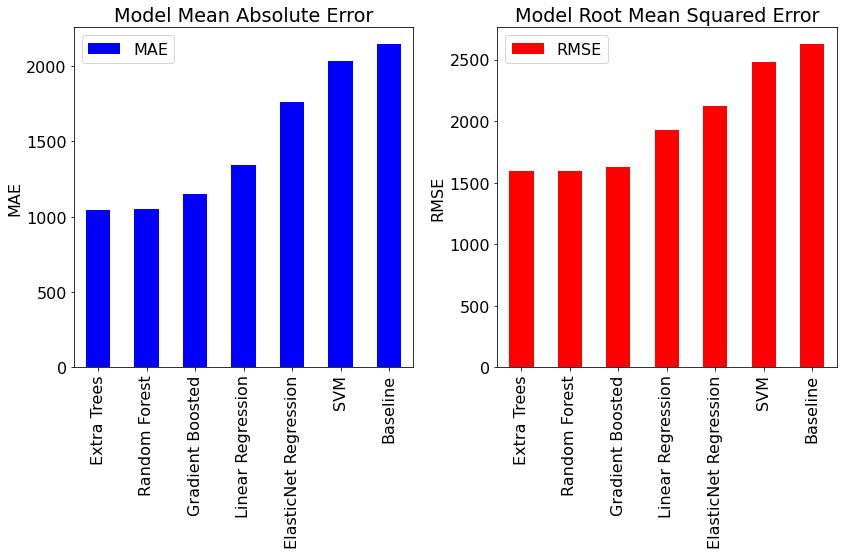

In [41]:
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('MAE', ascending = True).plot.bar(y = 'MAE', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('RMSE', ascending = True).plot.bar(y = 'RMSE', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [42]:

print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Gradient Boosted', 'MAE'] - results.loc['Baseline', 'MAE'])) / results.loc['Baseline', 'MAE']))

The Gradient Boosted regressor is 46.45% better than the baseline.


Implementing Bayesian Linear Regression

In [43]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'TotalTimeTakenSeconds ~' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'TotalTimeTakenSeconds ~TotalDatabaseCount + TotalTableCount + TotalRuleCount + TotalTimeTakenSeconds'


Create Model in PyMC3 and Sample from Posterior

In [ ]:
%matplotlib inline
x1 = df.drop(columns='TotalTimeTakenSeconds')
y1 = df.iloc[:,:-1]
with Model() as model:
  #Defining pripors
  sigma=HalfCauchy('sigma',beta=10,testval=1)
  intercept=Normal('Intercept',0,sd=20)
  x_coeff=Normal('x1',0,sd=20)
  #Defining Liklihood
  liklihood=Normal('y1',mu=intercept+x_coeff*x1,sd=sigma,observed=y1)
  #Inference
  trace=sample(progressbar=true)

In [76]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500,init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, TotalTimeTakenSeconds, TotalRuleCount, TotalTableCount, TotalDatabaseCount, Intercept]
100%|██████████| 2500/2500 [00:01<00:00, 1347.37it/s]
There were 833 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1764 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Traceplot of All Samples

In [78]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

In [ ]:
plot_trace(normal_trace);

In [ ]:
!apt install pymc3[plots] -q

In [ ]:
pm.traceplot(normal_trace);

In [ ]:
pm.forestplot(normal_trace);

In [ ]:
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20);

In [96]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 0.0000
Variable: TotalDatabaseCount Mean weight in model: 0.0000
Variable: TotalTableCount Mean weight in model: 0.0000
Variable: TotalRuleCount  Mean weight in model: 0.0000
Variable: TotalTimeTakenSeconds Mean weight in model: 0.2721
Variable: sd_log__        Mean weight in model: 0.0436
Variable: sd              Mean weight in model: 1.0451


In [ ]:

pm.df_summary(normal_trace)

**Evaluate Bayesian Model Using Mean of Model Parameters**

In [102]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('MAE', ascending = True).plot.bar(y = 'MAE', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('RMSE', ascending = True).plot.bar(y = 'RMSE', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Model  MAE: 1897.1721
Model RMSE: 2635.2838


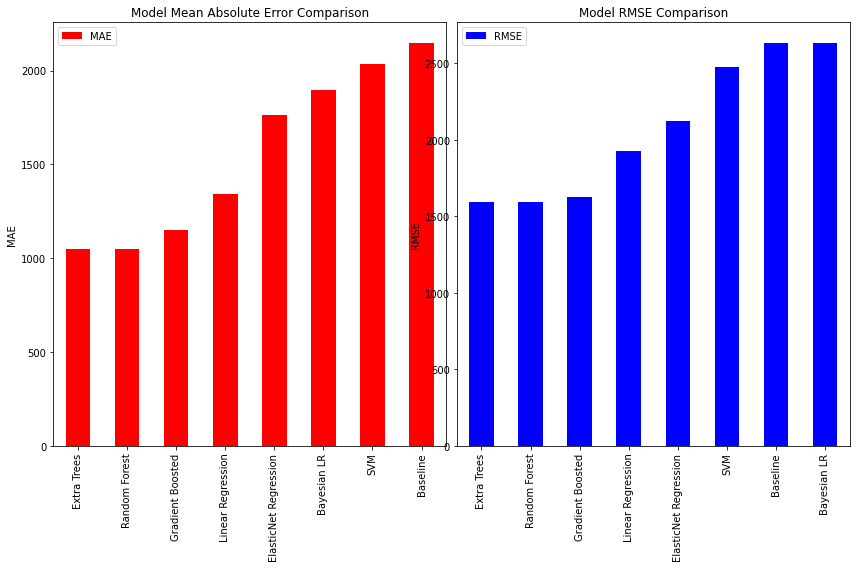

In [103]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test, results)

In [104]:
all_model_results

,MAE,RMSE
Linear Regression,1343.64,1928.19
ElasticNet Regression,1761.9,2125.87
Random Forest,1047.95,1594.33
Extra Trees,1046.52,1593.92
SVM,2035.16,2477.41
Gradient Boosted,1150.73,1623.78
Baseline,2149.01,2629.91
Bayesian LR,1897.17,2635.28
